The DNA is a natural sequence. It is easy to see how compute PE on this serie.

As reference we need to konw how performs the random serie, the white noise.

In [1]:
import numpy as np


In [2]:
def randomSerie(N):
    
    from random import randint
    D=list('ATGC')
    return [D[randint(0,3)] for _ in range(N)]


We need slight modifications in the PE algorithm

In [6]:
def PA(s,m,b,okfreq=False):
    freq={}
    if b>1:
        a=[]
        for i in range(b):
            a+=s[i::b]
        s=list(a)
    for indx in range(m,len(s)+1):
        key=tuple(s[indx-m:indx])
        freq[key]=freq.get(key,0)+1
        
    fr=np.array(list(freq.values()))
    fr=fr/fr.sum()
    if okfreq:
        return -(fr*np.log(fr)).sum(),freq
    return -np.sum(fr*np.log(fr))

In [3]:
PATH='Permutation/data/ADN/'

names=['B_brevis','E-coli','Thermotoga-petrophila','Vibrio_cholerae','lambda_virus','phi_virus']

series=[]
for name in names:
    raw=open(PATH+name+'.txt','r').readlines()
    raw=[item.strip('\n') for item in raw]
    raw=list(''.join(raw))
    series.append(raw)
    


In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
m=5
res=[]
for serie in series:
    tmp=[]
    for b in range(1,1000,10):
        tmp.append(PA(serie,m,b))
    res.append(tmp)

res=np.array(res).transpose()

<IPython.core.display.Javascript object>


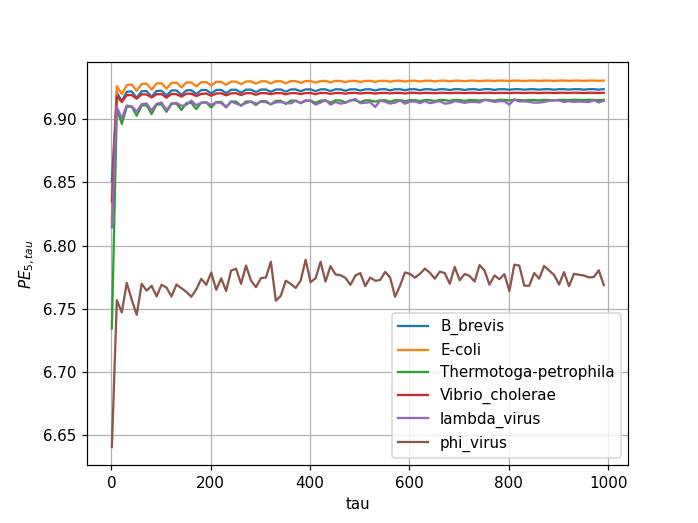

In [8]:
for col in range(len(names)):
    plt.plot(range(1,1000,10),res[:,col])
plt.grid()
plt.xlabel('tau')
plt.ylabel('$PE_{%i,tau}$' % m)
plt.legend(names)

Random references for series.


In [22]:
from random import randint
serb=[]

for item in series:
    serb.append(randomSerie(len(item)))
    

In [12]:
#Series lenght

for name,s in zip(names,series):
    print(name,len(s))

B_brevis 6296436
E-coli 4639675
Thermotoga-petrophila 1823511
Vibrio_cholerae 1108250
lambda_virus 48502
phi_virus 5386


The PE values for the random series

In [23]:
blank=[]
for serie in serb:
    tmp=[]
    for b in range(1,1000,10):
        tmp.append(PA(serie,m,b))
    blank.append(tmp)
blank=np.array(blank).transpose()


In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


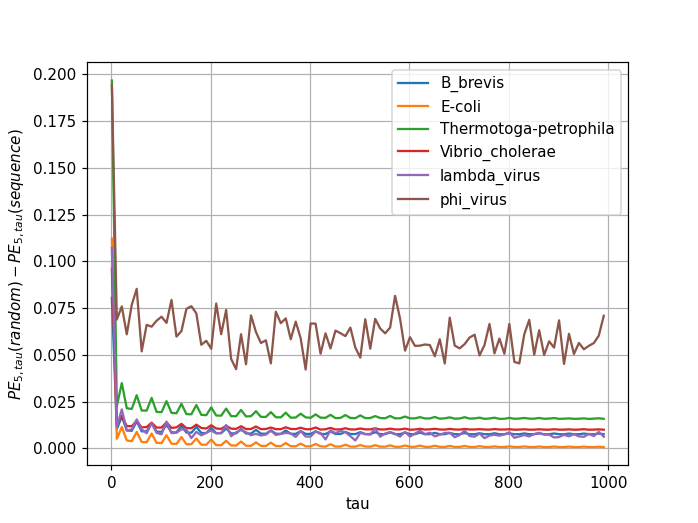

In [18]:
for col in range(len(names)):
    plt.plot(range(1,1000,10),blank[:,col]-res[:,col])
plt.grid()
plt.legend(names)
plt.xlabel('tau')
plt.ylabel('$PE_{%i,tau}(random)-PE_{%i,tau}(sequence)$' % (m,m))
plt.show()

The size matters

In [19]:
limit=1e6
for item in series:
    limit=min(limit,len(item))
limit

5386

The 5386 first characters of each sequence

In [20]:
piece=[]
for serie in series:
    tmp=[]
    for b in range(1,1000,10):
        tmp.append(PA(serie[:limit],m,b))
    piece.append(tmp)
piece=np.array(piece).transpose()


<IPython.core.display.Javascript object>


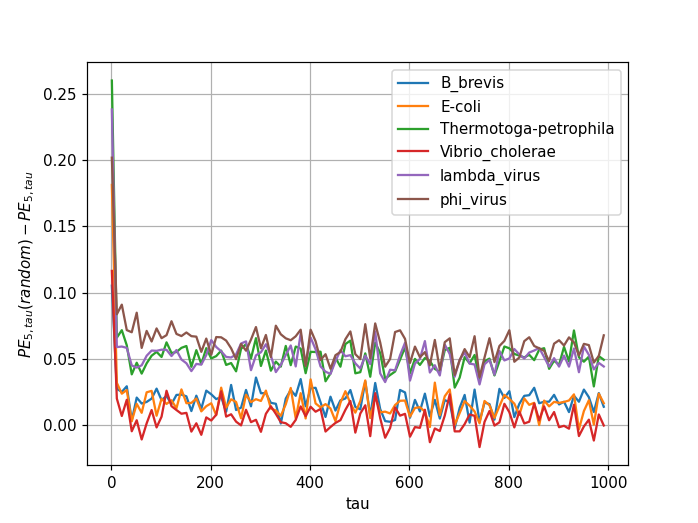

In [24]:
for col in range(len(names)):
    plt.plot(range(1,1000,10),blank[:,-1]-piece[:,col])
plt.grid()
plt.legend(names)
plt.xlabel('tau')
plt.ylabel('$PE_{%i,tau}(%s)-PE_{%i,tau}$' % (m,'random',m))
plt.show()